# Introduction to data analysis in electromyography

> Marcos Duarte  
> Laboratory of Biomechanics and Motor Control ([http://demotu.org/](http://demotu.org/))  
> Federal University of ABC, Brazil

Electromyography (EMG), from Latin, literally means recording of muscle electricity. Nowadays, a more accurate definition is that EMG is the technique employed to register the electrical signal related to muscle activation.   

This electrical signal represents the electrical current generated by the ionic flow across the membranes of muscle fibers when the motor unit is fired. A motor unit is the functional unit of a muscle and consists of an alpha motor neuron and the muscle fibers innervated by this motor neuron. This electrical signal can be captured by invasive needle or wire electrodes placed directly near the muscle fibers (intramuscular EMG) of by electrodes placed on the skin where it is captured the electrical signal that propagates through the tissues of the human body (surface EMG). The use of surface EMG is much more common in human motion studies and here will see an introduction to the analysis of the surface EMG signal.   

For a typical muscle activation during voluntary human movement, the measured surface EMG signal is the result of an algebraic summation of many motor unit action potentials. A typical surface EMG signal has a random characteristic with zero mean, about 1 mV of peak-to-peak amplitude, and frequencies between 5-10 and 400-450 Hz, but these values can be affected by many factors including intensity of the muscle activation, the distance from the motor units to the skin surface, the geometry of the electrodes, etc.  

Let's load a surface EMG signal from a voluntary contraction and analyze it.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# load data file
time, data = np.loadtxt('./../data/emg.csv', delimiter=',', unpack=True)
freq = 1/np.mean(np.diff(time))

And let's plot the data:

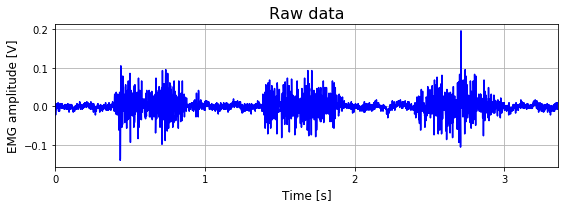

In [3]:
# plot data
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
ax.plot(time, data, 'b')
ax.set_xlabel('Time [s]', fontsize=12)
ax.set_ylabel('EMG amplitude [V]', fontsize=12)
ax.set_xlim(time[0], time[-1])
ax.set_title('Raw data', fontsize=16)
plt.locator_params(axis = 'both', nbins = 4)
plt.grid()
plt.tight_layout()

## Filtering

Any bioelectrical signal is contaminated by noise, be it from other electrical sources in the human body, from external sources, or by the own process of measurement.
To get rid of part of this noise, we can apply a band-pass filter to only pass signals with frequencies in the desired range.
A common choice for filtering EMG data it's the Butterworth filter with zero lag. For more about data filtering [click here](http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/DataFiltering.ipynb).  
Let's employ a Butterworth filter with band pass at 10-400 Hz, second order, and zero lag:

In [4]:
# band-pass Butterworth filter
from scipy.signal import butter, filtfilt
b, a = butter(2, ([10, 400]/(freq/2)), btype = 'bandpass')
dataf = filtfilt(b, a, data)

Note that the high-pass filter removes any offset in the signal (a constant value or DC component can be thought as a signal with frequency equals to zero).

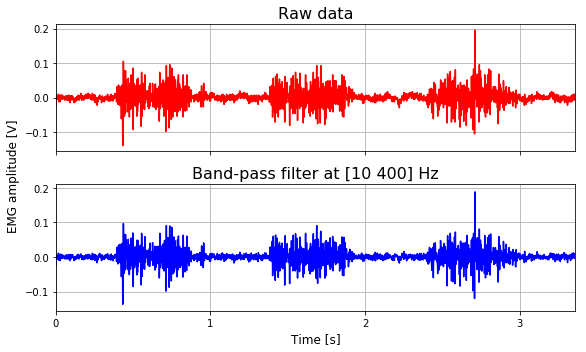

In [5]:
# plot data
fig, (ax1,ax2) = plt.subplots(2, 1, sharex = True, sharey = True, figsize = (8, 5))
ax1.plot(time, data, 'r')
ax1.set_title('Raw data', fontsize=16)
ax1.grid()
ax2.plot(time, dataf, 'b')
ax2.set_xlabel('Time [s]', fontsize=12)
ax2.set_xlim(time[0], time[-1])
ax2.set_title('Band-pass filter at [10 400] Hz', fontsize=16)
fig.text(0, 0.5, 'EMG amplitude [V]', ha='center', va='center',
         rotation='vertical', fontsize=12)
plt.locator_params(axis = 'both', nbins = 4)
ax2.grid()
plt.tight_layout()

## Linear envelope

A common processing of the EMG signal is to calculate an activation level of the signal, a process called linear envelope. The linear envelope consists in two steps: the signal is full-wave rectified by computing the absolute value of the signal; then the rectified signal is low-pass filtered with a cutoff frequency typically at the range of 3 to 8 Hz, depending of the contraction muscle characteristics and the specific application for the linear envelope processing. This last step can also be reproduced with a moving average of the rectified signal with a moving window of 100 to 200 ms of duration.   Alternatively, instead of the two previous steps, it can be applied a moving root mean square (RMS) with a moving window of 100 to 200 ms of duration to the original signal.

Let's calculate the linear envelope. First, the full-wave rectification:

In [7]:
# full-wave rectification
datafr = abs(dataf)

Second, a low-pass filter at 8 Hz using a Butterworth filter of second order and zero lag:

In [8]:
# low-pass Butterworth filter
b, a = butter(2, (8/(freq/2)), btype = 'low')
datafrle = filtfilt(b, a, datafr)

Let's plot the results of each operation:

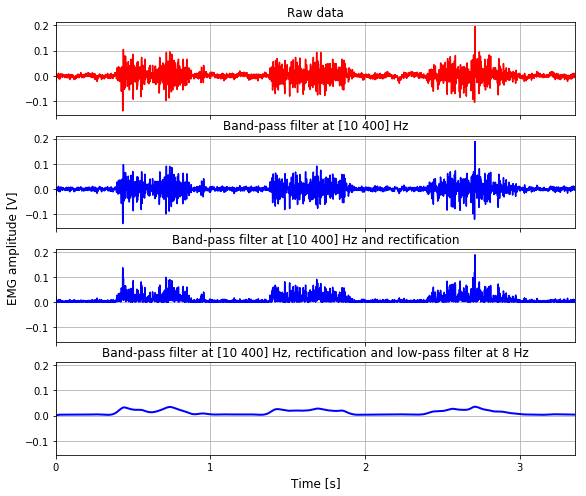

In [9]:
# plot data
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4, 1, sharex = True, sharey = True, figsize = (8, 7))
ax1.plot(time, data, 'r')
ax1.set_title('Raw data', fontsize=12)
ax1.set_xlim(time[0], time[-1])
ax1.grid()
ax2.plot(time, dataf, 'b')
ax2.set_title('Band-pass filter at [10 400] Hz', fontsize=12)
ax2.grid()
ax3.plot(time, datafr, 'b')
ax3.set_title('Band-pass filter at [10 400] Hz and rectification', fontsize=12)
ax3.grid()
ax4.plot(time, datafrle, 'b', linewidth=2)
ax4.set_xlabel('Time [s]', fontsize=12)
ax4.set_title('Band-pass filter at [10 400] Hz, rectification and low-pass filter at 8 Hz',
              fontsize=12)
fig.text(0, 0.5, 'EMG amplitude [V]', ha='center', va='center',
         rotation='vertical', fontsize=12)
plt.locator_params(axis = 'both', nbins = 4)
ax4.grid()
plt.tight_layout(h_pad=.1)

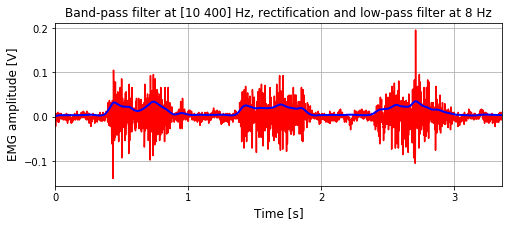

In [10]:
# plot data
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
ax.plot(time, data, 'r')
ax.plot(time, datafrle, 'b', linewidth=2)
ax.set_xlabel('Time [s]', fontsize=12)
ax.set_ylabel('EMG amplitude [V]', fontsize=12)
ax.set_title('Band-pass filter at [10 400] Hz, rectification and low-pass filter at 8 Hz',
          fontsize=12)
ax.set_xlim(time[0], time[-1])
plt.locator_params(axis = 'both', nbins = 4)
plt.grid()

Note that to calculate the linear envelope of the EMG signal, we (1) removed all frequencies below 10 Hz and above 400 Hz; (2) rectified the signal; and (3) removed all frequencies above 5 Hz.  

How it is possible to have any signal with frequencies below 5 Hz after the third step if we removed all frequencies below 10 Hz in the first step? The trick is that the rectification operation creates new frequencies in the signal.  

The band-pass filtering in the first step is not part of the linear envelope processing. One can calculate the linear envelope directly for the raw signal. However if we do that for an raw EMG signal with an offset, its linear envelope will always have values much greater than zero suggesting a muscle activation where there was not.

Let's write a function that calculates the linear envelope of a signal and allows the user to input different parameters for the filtering:

In [11]:
def linear_envelope(x, freq=1000, fc_bp=[10, 400], fc_lp=8):
    r"""Calculate the linear envelope of a signal.

    Parameters
    ----------
    x     : 1D array_like
            raw signal
    freq  : number
            sampling frequency
    fc_bp : list [fc_h, fc_l], optional
            cutoff frequencies for the band-pass filter (in Hz)
    fc_lp : number, optional
            cutoff frequency for the low-pass filter (in Hz)

    Returns
    -------
    x     : 1D array_like
            linear envelope of the signal

    Notes
    -----
    A 2nd-order Butterworth filter with zero lag is used for the filtering.  

    See this notebook [1]_.

    References
    ----------
    .. [1] https://github.com/demotu/BMC/blob/master/notebooks/Electromyography.ipynb

    """
    
    import numpy as np
    from scipy.signal import butter, filtfilt
    
    if np.size(fc_bp) == 2:
        # band-pass filter
        b, a = butter(2, (fc_bp/(freq/2.)), btype = 'bandpass')
        x = filtfilt(b, a, x)   
    if np.size(fc_lp) == 1:
        # full-wave rectification
        x = abs(x)
        # low-pass Butterworth filter
        b, a = butter(2, (fc_lp/(freq/2.)), btype = 'low')
        x = filtfilt(b, a, x)
    
    return x

## Onset detection

A common operation in the analysis of EMG data is to select the period of muscle activation based on the amplitude of the EMG signal. Of course this can be done manually by showing the EMG signal on a window and the expert user manually selects the events with mouse clicks, but a lot of research has been conducted to propose automatic methods to perform this task.  

### Amplitude-threshold method

The simplest method to automatically detect the onset in the EMG signal is based on amplitude threshold, where the EMG signal is considered to be 'on' when it is above a certain threshold. This threshold is usually proportional to the amplitude of the baseline (the part of the EMG signal that we know there is no muscle activation), for example, a threshold equals to three times the standard deviation of the baseline. To avoid the detection of spikes in the EMG signal, a second threshold can be used imposing that the signal should be above the threshold for at least a certain period (number of samples).  

The raw EMG signal can not be analyzed for the onset detection based on amplitude threshold because its amplitude varies from positive to negative very fast. The linear envelope of the EMG signal is usually analyzed or the amplitude detection is performed in terms of the standard deviation or RMS of the signal.

The text [
Detection of onset in data](http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/DetectOnset.ipynb) presents a Python code to perform onset detection. Let's use that code:

In [12]:
import sys
sys.path.insert(1, r'./../functions')  # add to pythonpath
from detect_onset import detect_onset

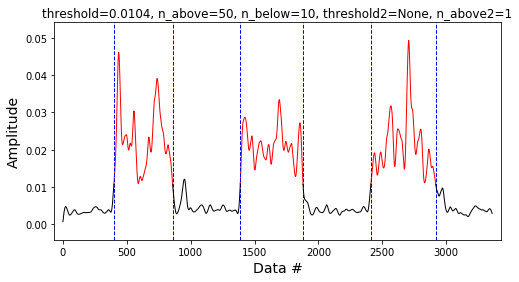

array([[ 399,  859],
       [1388, 1879],
       [2410, 2918]])

In [13]:
threshold=2
window=50
data2 = linear_envelope(data, freq, fc_bp=[20, 400], fc_lp=20)
inds = detect_onset(data2, threshold=threshold*np.std(data[0:200]),
                    n_above=window, n_below=10, show=True)
inds

### The Teager–Kaiser Energy operator to improve onset detection

The Teager–Kaiser Energy (TKE) operator has been proposed to increase the accuracy of the onset detection by improving the SNR of the EMG signal (Li et al., 2007).   
The TKE operator processes the data in the following way:

$$ y[n]=x^2[n]-x[n-1]\cdot x[n+1] $$

Where $x[n]$ is the sample $n$ of the signal $x$.

Let's write a function that implements the TKE operator:

In [14]:
def tkeo(x):
    r"""Calculates the Teager–Kaiser Energy operator.

    Parameters
    ----------
    x : 1D array_like
        raw signal

    Returns
    -------
    y : 1D array_like
        signal processed by the Teager–Kaiser Energy operator

    Notes
    -----

    See this notebook [1]_.

    References
    ----------
    .. [1] https://github.com/demotu/BMC/blob/master/notebooks/Electromyography.ipynb

    """
    x = np.asarray(x)
    y = np.copy(x)
    # Teager–Kaiser Energy operator
    y[1:-1] = x[1:-1]*x[1:-1] - x[:-2]*x[2:]
    # correct the data in the extremities
    y[0], y[-1] = y[1], y[-2]
    
    return y

And let's test it (with the same parameters as before):

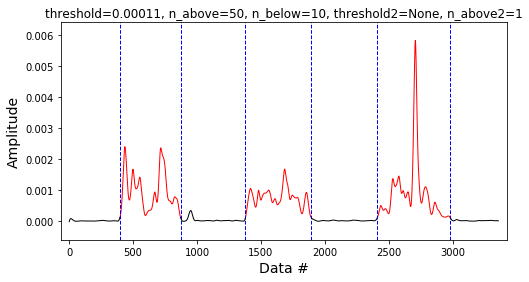

array([[ 397,  872],
       [1379, 1896],
       [2411, 2983]])

In [15]:
threshold = 2
window = 50
data3 = tkeo(dataf)
data4 = linear_envelope(data3, freq, fc_bp=[20, 400], fc_lp=20)
inds2 = detect_onset(data4, threshold=threshold*np.std(data3[0:200]),
                     n_above=window, n_below=10, show=True)
inds2

## Amplitude estimation

Different measures can be used to describe the amplitude of the EMG signal:  

* Mean, median   
* Standard deviation (SD)
* Root mean square (RMS)   
* Maximum, minimum   
* Etc.

From the above, RMS is probably the less usual and it defined as:

$$ RMS(x) = \sqrt{\frac{1}{N}\sum_{i=1}^{N}\; x_i^2 } $$

And in Python/Numpy:

In [16]:
rms = np.sqrt(np.mean(dataf**2)) # root mean square, the name makes sense.
rms

0.020019669235775334

All the measures above have the same unit as the original EMG signal and they can be applied directly to the raw or to the linear evelope of the EMG signal.

## Integration (area)

The area of the signal-versus-time curve (integral) is another measure used in EMG processing.   
The definition of the integral for a continuous function is:

$$ \text{Area}= \int_{t_i}^{t_f}x(t)dt $$

For discrete data, as the EMG signal, the integral can be calculated by numerical integration using the rectangle rule:

$$ \text{Area} \;\approx\; \Delta t \sum_{i=1}^{N}\:x(t_i) $$

Or more accurately, using the trapezoidal rule:

$$ \text{Area} \;\approx\; \Delta t \sum_{i=1}^{N-1}\frac{x(t_i)+x(t_{i+1})}{2} $$

And in Python/Numpy:

In [17]:
x = dataf
Dt = 1/freq  # time increment between samples
Arect = Dt*sum(x)
from scipy.integrate import trapz
Atrap = Dt*trapz(x)
Atrap

3.07845984087131e-05

The integrals above are single numbers, the total area under the EMG curve.   
If we want to calculate the integral as a function of time, we have to use the cumulative integration:

In [18]:
from scipy.integrate import trapz, cumtrapz

In [19]:
Arect = Dt*np.cumsum(x)
Atrap = Dt*cumtrapz(x)

As the raw EMG signal has zero mean, one is usually interested in the area under the curve of the linear envelope.   
Let's experiment with these integration measures:

In [20]:
Arect = sum(datafrle)/freq
print('Total area by the rectangle rule: %f Vs'%Arect)
Atrap = trapz(datafrle)/freq
print('Total area by the trapezoid rule: %f Vs'%Atrap)

Total area by the rectangle rule: 0.040508 Vs
Total area by the trapezoid rule: 0.040506 Vs


Note that the 'Vs' above is not the plural of V; it's Volts times seconds.   
And now the cumulative integration:

In [21]:
Arect2 = np.cumsum(datafrle)/freq
Atrap2 = cumtrapz(datafrle, initial=0)/freq

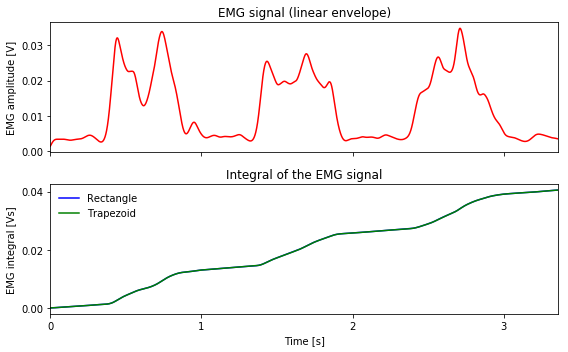

In [22]:
# plot data
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 5))
ax1.plot(time, datafrle, 'r')
ax1.set_title('EMG signal (linear envelope)')
ax1.set_ylabel('EMG amplitude [V]')
ax1.set_xlim(time[0], time[-1])
ax2.plot(time, Arect2, 'b', label='Rectangle')
ax2.plot(time, Atrap2, 'g', label='Trapezoid')
ax2.set_xlabel('Time [s]')
ax2.set_title('Integral of the EMG signal')
ax2.set_ylabel('EMG integral [Vs]')
ax2.legend(loc='upper left', frameon=False)
plt.locator_params(axis = 'both', nbins = 4)
plt.tight_layout()

Note that the value of the total area is equal to the last value of the cumulative integration from the graph above.   

The trapezoidal rule is more accurate than the rectangle rule to calculate the integration of a function.  
So, why they resulted in the same values?   
The trick is that using the rectangle rule, the area is superestimated in the ascending part and subestimated in the descending part of the curve. Since the EMG signal has zero mean, i.e., equal amounts of ascending and descending parts, the errors are cancelled out.
See that the rectangle and trapezoidal rules are indeed different:

In [23]:
x = [0, 2, 4, 6, 8]
print('Integral by the rectangle rule:', np.cumsum(x)*1.0)
print('Integral by the trapezoid rule:', cumtrapz(x,initial=0))

Integral by the rectangle rule: [  0.   2.   6.  12.  20.]
Integral by the trapezoid rule: [  0.   1.   4.   9.  16.]


But if x has zero mean, the total values of the integral using the cumsum and cumtrapz methods will be the same:

In [24]:
x = x - np.mean(x)
print('Integral by the rectangle rule:', np.cumsum(x)*1.0)
print('Integral by the trapezoid rule:', cumtrapz(x, initial=0))

Integral by the rectangle rule: [-4. -6. -6. -4.  0.]
Integral by the trapezoid rule: [ 0. -3. -4. -3.  0.]


### Integrator with time reset

Another measure used in EMG processing is to calculate the integral but reset the integrator from time to time:

In [25]:
nreset = 400 # reset after this amount of samples
area = []
for i in range(int(np.ceil(np.size(datafrle)/nreset))):
    area = np.hstack((area, cumtrapz(datafrle[i*nreset:(i+1)*nreset], initial=0)/freq))

And let's plot the data:

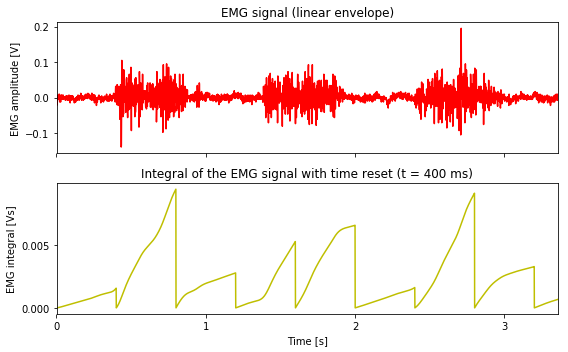

In [26]:
# plot data
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 5))
ax1.plot(time, data, 'r')
ax1.set_title('EMG signal (linear envelope)')
ax1.set_ylabel('EMG amplitude [V]')
ax1.set_xlim(time[0], time[-1])
ax2.plot(time, area, 'y', label='Trapezoid')
ax2.set_xlabel('Time [s]')
ax2.set_title('Integral of the EMG signal with time reset (t = %s ms)' %nreset)
ax2.set_ylabel('EMG integral [Vs]')
plt.locator_params(axis='both', nbins=4)
plt.tight_layout()

## Frequency estimation

### Power Spectral Density

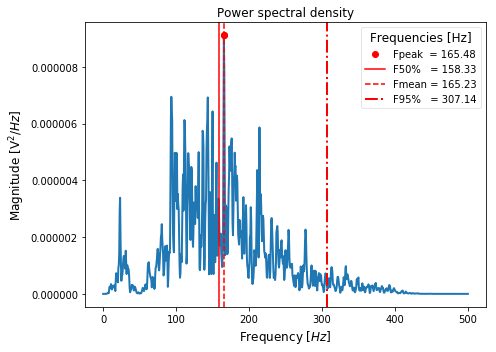

In [27]:
from psd import psd
fpcntile, mpf, fmax, Ptotal, f, P = psd(dataf, fs=freq)

### Short-Time Fourier Transform

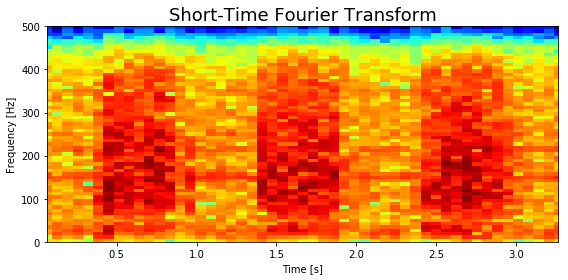

In [28]:
fig, ax1 = plt.subplots(1, 1, figsize=(8, 4))
P, freqs, t, im = plt.specgram(dataf, NFFT=128, Fs=freq, noverlap = 64, cmap=plt.cm.jet)
# P: array of shape (len(times), len(freqs)) of power,
# freqs: array of frequencies, 
# bins: time points the spectrogram is calculated over,
# im: matplotlib.image.AxesImage instance
ax1.set_title('Short-Time Fourier Transform', fontsize=18)
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Frequency [Hz]')
ax1.set_xlim(t[0], t[-1])
plt.tight_layout()

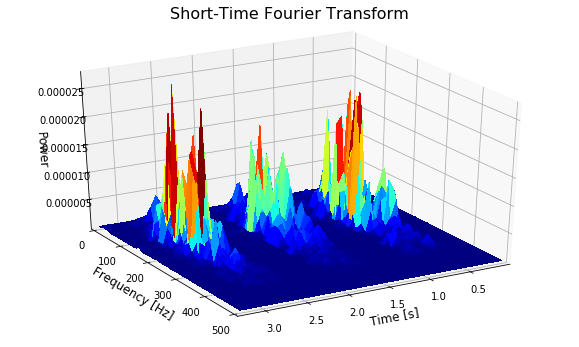

In [29]:
from mpl_toolkits.mplot3d import Axes3D

t2, freqs2 = np.meshgrid(t, freqs)

fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(t2, freqs2, P, rstride=1, cstride=1, cmap=plt.cm.jet,
                       linewidth=0, antialiased=False)

ax.set_xlim(t[0], t[-1])
ax.set_ylim(0, 500)
ax.set_zlim(np.min(P), np.max(P))
ax.set_xlabel('Time [s]', fontsize=12)
ax.set_ylabel('Frequency [Hz]', fontsize=12)
ax.set_zlabel('Power', fontsize=12)
ax.set_title('Short-Time Fourier Transform', fontsize=16, y=1.04)
ax.view_init(30, 60)
plt.show()

## References

- De Luca CJ (1997) [The use of electromyography in biomechanics](http://delsys.com/KnowledgeCenter/Tutorials_Technical%20Notes.html). Journal of Applied Biomechanics,  13, 135-163.
- Konrad P (2006) [The ABC of EMG: A Practical Introduction to Kinesiological Electromyography](http://www.noraxon.com/docs/education/abc-of-emg.pdf). Noraxon U.S.A., Inc.
- Li X, Zhou P, Aruin AS (2007) [Teager–Kaiser Energy Operation of surface EMG improves muscle activity onset detection](http://www.ncbi.nlm.nih.gov/pubmed/17473984). Annals of Biomedical Engineering, 35, 1532–1538. 
- Merletii R (1999) [Standards for Reporting EMG data](http://www.isek-online.org/standards_emg.html). Journal of Electromyography and Kinesiology, February 1999; 9(1):III-IV.
- Merletii R, Parker PJ (2004) [Electromyography: Physiology, Engineering, and Non-Invasive Applications](http://books.google.com.br/books?id=SQthgVMil3YC). Wiley-IEEE Press.
- Winter DA (2009) [Biomechanics and motor control of human movement](http://books.google.com.br/books?id=_bFHL08IWfwC&printsec=frontcover&source=gbs_ge_summary_r&cad=0#v=onepage&q&f=false). 4 ed. Hoboken, EUA: Wiley.